In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('/home/kuba/wakacje/machine_lerning/train_mnist.csv')
train_data = np.array(train_data)

In [3]:
np.random.shuffle(train_data)
x_train, y_train = np.array(train_data)[:36000,1:], np.array(train_data)[:36000,0]
x_test, y_test = np.array(train_data)[36000:,1:], np.array(train_data)[36000:,0]

In [4]:
x_train.shape

(36000, 784)

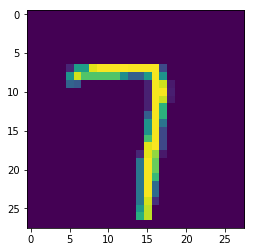

In [5]:
im = x_train[0].reshape(28,28)
plt.imshow(im)

In [6]:
# let's normalize our data 
x_train = x_train / 255
x_test  = x_test  / 255
x_train = x_train.reshape(36000,28,28,1)
x_test  = x_test.reshape(6000,28,28,1)

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(800, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 800)               640800    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [13]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
36000/36000 [==============================] - 15s 409us/sample - loss: 0.0149 - acc: 0.9952
Epoch 2/20
36000/36000 [==============================] - 15s 419us/sample - loss: 0.0125 - acc: 0.9961
Epoch 3/20
36000/36000 [==============================] - 15s 421us/sample - loss: 0.0101 - acc: 0.9969
Epoch 4/20
36000/36000 [==============================] - 15s 423us/sample - loss: 0.0095 - acc: 0.9968
Epoch 5/20
36000/36000 [==============================] - 16s 455us/sample - loss: 0.0090 - acc: 0.9973
Epoch 6/20
36000/36000 [==============================] - 16s 445us/sample - loss: 0.0071 - acc: 0.9977
Epoch 7/20
36000/36000 [==============================] - 16s 447us/sample - loss: 0.0043 - acc: 0.9986
Epoch 8/20
36000/36000 [==============================] - 16s 458us/sample - loss: 0.0075 - acc: 0.9975
Epoch 9/20
36000/36000 [==============================] - 19s 526us/sample - loss: 0.0053 - acc: 0.9981
Epoch 10/20
36000/36000 [==============================] - 14s 3

In [14]:
model.evaluate(x_test,y_test)

6000/6000 [==============================] - 1s 128us/sample - loss: 0.0902 - acc: 0.9890


[0.09020353584386757, 0.989]

In [17]:
kaggle_data = pd.read_csv('/home/kuba/wakacje/machine_lerning/test_mnist.csv',header=None)

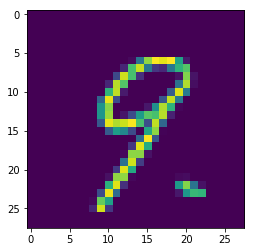

In [18]:
kaggle_data_ = np.array(kaggle_data)
kaggle_data_ = kaggle_data_[1:,:]
kaggle_data_ = np.array(kaggle_data_, dtype = int)
im = kaggle_data_[2].reshape(28,28)
plt.imshow(im)

In [21]:
X = kaggle_data_
X = X / 255
X = X.reshape(28000,28,28,1)

In [22]:
out = model.predict(X)
out = np.argmax(out, axis = 1)
out.shape

(28000,)

In [23]:
ImageId = np.arange(28000)
ImageId += 1
Out_file = pd.DataFrame({'ImageId': ImageId, 'Label': out})
Out_file.to_csv('Mnist_kaggle', index=False)

`Got us 98.8 % on kaggle` 